# Crime Analysis and Prediction

This file contains a set of experiments for analyzing and extrapolating data regarding crimes.

## 1. Data Loading and Sanitization

In [22]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from data import CrimeLoader
import numpy as np

# Crime loader now handles all of the data saving and parsing
#    force_refresh - If true, will read from the original files rather than a saved pickle file
#    force_save - If true, will save any loaded data into a pickle for later loading
#    data_limit - The number of crimes to load (used for speedup)
data = CrimeLoader()
data.load_data(force_refresh=True, force_save=False, data_limit=100000, randomize=True)

# List of possible features to include:
#    day                - Day of the week (ex: SUN - SAT) 1-hot encoded
#    time               - Time of day (ex: Morning, Afternoon, Evening, Late Night) 1-hot encoded
#    time min           - Time in minutes (ex: 1420 minutes) Integer value (not 1-hot encoded)
#    hour               - Time in hour (ex: 13) Integer value (not 1-hot encoded)
#    location           - Location of crime, (ex: lat, long) 2 float values
#    location normalized - Location of crime [0,1]
#    crime condensed    - Encoding of crime, 1-hot encoded of length 9 (?)
#    crime full         - Encoding of crime, 1-hot encoded of length ~ 30
#    neighborhood       - Neighborhood of the crime (1-hot encoded, length 77)
#    below poverty count - A number representing the rate of people below the poverty level
#    crowded            - Crowding rate
#    no diploma         - No diploma rate
#    income             - Per capita income in that neighborhood
#    unemployment       - Unemployment percentage for that neighborhood
#    all                - Some combination of the above (see source)

#X_features = ["time min"]
X_features = ["income", "below poverty count", "no diploma", "unemployment", "time min", "location normalized"]
#X_features = ["income"]
#X_features = ["income", "time min"]
Y_features = ["crime condensed"]
X, Y, X_decoder, Y_decoder = data.get_workable_data(X_features, Y_features)
print("Featurization achieved")

Loading crime data
Finished loading crime data
Now loading social / economics data
Finished loading Chicago social data
Creating X feature matrix
Creating Y feature matrix
Featurization complete
Featurization achieved


## 2. K-Nearest Neighbors

In [3]:
def train_KNN(feature_matrix, targets, n):
    knn = KNeighborsClassifier(n_neighbors=n)
    Y = np.zeros(targets.shape[0])
    for i in range(targets.shape[0]):
        Y[i] = np.argmax(targets[i])
    knn.fit(feature_matrix,Y)
    return knn


In [4]:
def int_to_category(prediction):
    categories = ["KIDNAPPING / CHILDREN","ROBBERY/BURGLARY/THEFT","ASSAULT/VIOLENCE","NARCOTICS","PUBLIC-RELATED CRIME","DAMAGE/ARSON","OTHER/NON-CRIMINAL","WEAPON-RELATED","PROHIBITIVE CRIME"]
    return categories[int(prediction)]


(97504, 7)
Validation set Performance with k = 1:0.262
Validation set Performance with k = 2:0.288
Validation set Performance with k = 3:0.322
Validation set Performance with k = 4:0.304
Validation set Performance with k = 5:0.316
Validation set Performance with k = 6:0.298
Validation set Performance with k = 7:0.312
Validation set Performance with k = 8:0.33
Validation set Performance with k = 9:0.336
Validation set Performance with k = 10:0.332
Validation set Performance with k = 11:0.31
Validation set Performance with k = 12:0.32
Validation set Performance with k = 13:0.322
Validation set Performance with k = 14:0.324
Validation set Performance with k = 15:0.31
Validation set Performance with k = 16:0.32
Validation set Performance with k = 17:0.312
Validation set Performance with k = 18:0.334
Validation set Performance with k = 19:0.33
Validation set Performance with k = 20:0.332
Validation set Performance with k = 21:0.32
Validation set Performance with k = 22:0.306
Validation set 

Validation set Performance with k = 11:0.354
Validation set Performance with k = 12:0.37
Validation set Performance with k = 13:0.382
Validation set Performance with k = 14:0.372
Validation set Performance with k = 15:0.372
Validation set Performance with k = 16:0.372
Validation set Performance with k = 17:0.374
Validation set Performance with k = 18:0.372
Validation set Performance with k = 19:0.368
Validation set Performance with k = 20:0.364
Validation set Performance with k = 21:0.366
Validation set Performance with k = 22:0.372
Validation set Performance with k = 23:0.366
Validation set Performance with k = 24:0.366
Validation set Performance with k = 25:0.372
Validation set Performance with k = 26:0.37
Validation set Performance with k = 27:0.378
Validation set Performance with k = 28:0.376
Validation set Performance with k = 29:0.388
Validation set Performance with k = 30:0.388
Validation set Performance with k = 31:0.386
Validation set Performance with k = 32:0.384
Validation s

Validation set Performance with k = 22:0.394
Validation set Performance with k = 23:0.394
Validation set Performance with k = 24:0.396
Validation set Performance with k = 25:0.392
Validation set Performance with k = 26:0.388
Validation set Performance with k = 27:0.388
Validation set Performance with k = 28:0.386
Validation set Performance with k = 29:0.39
Validation set Performance with k = 30:0.398
Validation set Performance with k = 31:0.396
Validation set Performance with k = 32:0.402
Validation set Performance with k = 33:0.396
Validation set Performance with k = 34:0.404
Test set Performance with k = 34:  0.39
Validation set Performance with k = 1:0.26
Validation set Performance with k = 2:0.34
Validation set Performance with k = 3:0.338
Validation set Performance with k = 4:0.332
Validation set Performance with k = 5:0.346
Validation set Performance with k = 6:0.366
Validation set Performance with k = 7:0.374
Validation set Performance with k = 8:0.378
Validation set Performance

Validation set Performance with k = 33:0.418
Validation set Performance with k = 34:0.422
Test set Performance with k = 34:  0.384
Validation set Performance with k = 1:0.274
Validation set Performance with k = 2:0.322
Validation set Performance with k = 3:0.336
Validation set Performance with k = 4:0.322
Validation set Performance with k = 5:0.336
Validation set Performance with k = 6:0.34
Validation set Performance with k = 7:0.326
Validation set Performance with k = 8:0.328
Validation set Performance with k = 9:0.338
Validation set Performance with k = 10:0.322
Validation set Performance with k = 11:0.324
Validation set Performance with k = 12:0.328
Validation set Performance with k = 13:0.346
Validation set Performance with k = 14:0.336
Validation set Performance with k = 15:0.348
Validation set Performance with k = 16:0.376
Validation set Performance with k = 17:0.366
Validation set Performance with k = 18:0.372
Validation set Performance with k = 19:0.38
Validation set Performanc

Validation set Performance with k = 9:0.318
Validation set Performance with k = 10:0.314
Validation set Performance with k = 11:0.33
Validation set Performance with k = 12:0.324
Validation set Performance with k = 13:0.334
Validation set Performance with k = 14:0.34
Validation set Performance with k = 15:0.332
Validation set Performance with k = 16:0.34
Validation set Performance with k = 17:0.332
Validation set Performance with k = 18:0.334
Validation set Performance with k = 19:0.338
Validation set Performance with k = 20:0.342
Validation set Performance with k = 21:0.332
Validation set Performance with k = 22:0.338
Validation set Performance with k = 23:0.34
Validation set Performance with k = 24:0.344
Validation set Performance with k = 25:0.35
Validation set Performance with k = 26:0.35
Validation set Performance with k = 27:0.368
Validation set Performance with k = 28:0.368
Validation set Performance with k = 29:0.362
Validation set Performance with k = 30:0.368
Validation set Pe

Validation set Performance with k = 19:0.328
Validation set Performance with k = 20:0.332
Validation set Performance with k = 21:0.33
Validation set Performance with k = 22:0.342
Validation set Performance with k = 23:0.348
Validation set Performance with k = 24:0.338
Validation set Performance with k = 25:0.342
Validation set Performance with k = 26:0.342
Validation set Performance with k = 27:0.342
Validation set Performance with k = 28:0.35
Validation set Performance with k = 29:0.352
Validation set Performance with k = 30:0.35
Validation set Performance with k = 31:0.356
Validation set Performance with k = 32:0.352
Validation set Performance with k = 33:0.35
Validation set Performance with k = 34:0.364
Test set Performance with k = 34:  0.37
Validation set Performance with k = 1:0.27
Validation set Performance with k = 2:0.36
Validation set Performance with k = 3:0.354
Validation set Performance with k = 4:0.36
Validation set Performance with k = 5:0.364
Validation set Performance 

Validation set Performance with k = 30:0.436
Validation set Performance with k = 31:0.428
Validation set Performance with k = 32:0.432
Validation set Performance with k = 33:0.432
Validation set Performance with k = 34:0.426
Test set Performance with k = 30:  0.364
Validation set Performance with k = 1:0.28
Validation set Performance with k = 2:0.364
Validation set Performance with k = 3:0.366
Validation set Performance with k = 4:0.36
Validation set Performance with k = 5:0.362
Validation set Performance with k = 6:0.374
Validation set Performance with k = 7:0.39
Validation set Performance with k = 8:0.38
Validation set Performance with k = 9:0.382
Validation set Performance with k = 10:0.388
Validation set Performance with k = 11:0.388
Validation set Performance with k = 12:0.388
Validation set Performance with k = 13:0.396
Validation set Performance with k = 14:0.408
Validation set Performance with k = 15:0.404
Validation set Performance with k = 16:0.4
Validation set Performance wi

Validation set Performance with k = 5:0.376
Validation set Performance with k = 6:0.362
Validation set Performance with k = 7:0.392
Validation set Performance with k = 8:0.418
Validation set Performance with k = 9:0.404
Validation set Performance with k = 10:0.41
Validation set Performance with k = 11:0.416
Validation set Performance with k = 12:0.416
Validation set Performance with k = 13:0.418
Validation set Performance with k = 14:0.406
Validation set Performance with k = 15:0.408
Validation set Performance with k = 16:0.41
Validation set Performance with k = 17:0.396
Validation set Performance with k = 18:0.402
Validation set Performance with k = 19:0.384
Validation set Performance with k = 20:0.39
Validation set Performance with k = 21:0.404
Validation set Performance with k = 22:0.392
Validation set Performance with k = 23:0.38
Validation set Performance with k = 24:0.382
Validation set Performance with k = 25:0.386
Validation set Performance with k = 26:0.39
Validation set Perfo

Validation set Performance with k = 16:0.378
Validation set Performance with k = 17:0.37
Validation set Performance with k = 18:0.366
Validation set Performance with k = 19:0.386
Validation set Performance with k = 20:0.404
Validation set Performance with k = 21:0.408
Validation set Performance with k = 22:0.406
Validation set Performance with k = 23:0.41
Validation set Performance with k = 24:0.4
Validation set Performance with k = 25:0.418
Validation set Performance with k = 26:0.412
Validation set Performance with k = 27:0.418
Validation set Performance with k = 28:0.414
Validation set Performance with k = 29:0.416
Validation set Performance with k = 30:0.408
Validation set Performance with k = 31:0.398
Validation set Performance with k = 32:0.402
Validation set Performance with k = 33:0.402
Validation set Performance with k = 34:0.4
Test set Performance with k = 25:  0.402
Validation set Performance with k = 1:0.276
Validation set Performance with k = 2:0.342
Validation set Perform

Validation set Performance with k = 27:0.392
Validation set Performance with k = 28:0.398
Validation set Performance with k = 29:0.394
Validation set Performance with k = 30:0.392
Validation set Performance with k = 31:0.396
Validation set Performance with k = 32:0.402
Validation set Performance with k = 33:0.406
Validation set Performance with k = 34:0.402
Test set Performance with k = 33:  0.392
Validation set Performance with k = 1:0.294
Validation set Performance with k = 2:0.37
Validation set Performance with k = 3:0.35
Validation set Performance with k = 4:0.376
Validation set Performance with k = 5:0.396
Validation set Performance with k = 6:0.404
Validation set Performance with k = 7:0.408
Validation set Performance with k = 8:0.406
Validation set Performance with k = 9:0.402
Validation set Performance with k = 10:0.406
Validation set Performance with k = 11:0.398
Validation set Performance with k = 12:0.406
Validation set Performance with k = 13:0.41
Validation set Performance

Validation set Performance with k = 3:0.342
Validation set Performance with k = 4:0.38
Validation set Performance with k = 5:0.378
Validation set Performance with k = 6:0.36
Validation set Performance with k = 7:0.398
Validation set Performance with k = 8:0.388
Validation set Performance with k = 9:0.394
Validation set Performance with k = 10:0.41
Validation set Performance with k = 11:0.388
Validation set Performance with k = 12:0.39
Validation set Performance with k = 13:0.386
Validation set Performance with k = 14:0.384
Validation set Performance with k = 15:0.392
Validation set Performance with k = 16:0.38
Validation set Performance with k = 17:0.38
Validation set Performance with k = 18:0.388
Validation set Performance with k = 19:0.374
Validation set Performance with k = 20:0.37
Validation set Performance with k = 21:0.364
Validation set Performance with k = 22:0.38
Validation set Performance with k = 23:0.38
Validation set Performance with k = 24:0.38
Validation set Performance 

Validation set Performance with k = 14:0.39
Validation set Performance with k = 15:0.374
Validation set Performance with k = 16:0.37
Validation set Performance with k = 17:0.366
Validation set Performance with k = 18:0.376
Validation set Performance with k = 19:0.368
Validation set Performance with k = 20:0.382
Validation set Performance with k = 21:0.372
Validation set Performance with k = 22:0.382
Validation set Performance with k = 23:0.388
Validation set Performance with k = 24:0.386
Validation set Performance with k = 25:0.374
Validation set Performance with k = 26:0.368
Validation set Performance with k = 27:0.37
Validation set Performance with k = 28:0.368
Validation set Performance with k = 29:0.374
Validation set Performance with k = 30:0.374
Validation set Performance with k = 31:0.374
Validation set Performance with k = 32:0.378
Validation set Performance with k = 33:0.376
Validation set Performance with k = 34:0.364
Test set Performance with k = 34:  0.42
Validation set Per

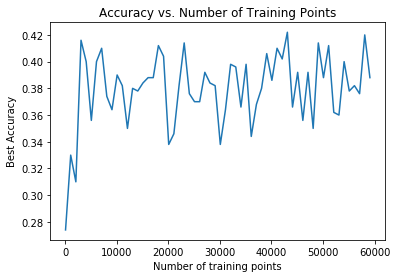

In [33]:
def evaluate_KNN(X, Y):
    x_values = []
    y_values = []
    for n in range(100, 60000, 1000):
        x_values.append(n)
        # Loading data
        # Loading data
        X_train = X[1:n]
        Y_train = Y[1:n]
        X_validate = X[n:n+500]
        Y_validate = Y[n:n+500]
        X_test = X[n+500:n+1000]
        Y_test = Y[n+500:n+1000]

        #Tuning on the validation set for value of K
        K = [k for k in range(1,35)]
        best_K = 0
        max_score = 0.0
        for k in K:
            knn = train_KNN(X_train, Y_train, k)
            predictions = knn.predict(X_validate)
            correct = 0.0
            for i in range(predictions.shape[0]):
                if int_to_category(predictions[i]) == Y_decoder(Y_validate[i])[0]:
                    correct += 1.0
            if correct > max_score:
                max_score = correct
                best_K = k
            print("Validation set Performance with k = " + str(k) + ":" + str(correct/predictions.shape[0]))
        #Evaluating on Test set with best K value
        knn = train_KNN(X_train, Y_train, best_K)
        predictions = knn.predict(X_test)
        correct = 0.0
        for i in range(predictions.shape[0]):
            if int_to_category(predictions[i]) == Y_decoder(Y_test[i])[0]:
                correct += 1.0
        if correct > max_score:
            max_score = correct
            best_K = k
        print("Test set Performance with k = " + str(best_K) + ":  " + str(correct/predictions.shape[0]))
        y_values.append(correct/predictions.shape[0])
    plt.plot(x_values, y_values,)
    plt.xlabel("Number of training points")
    plt.ylabel("Best Accuracy")
    plt.title("Accuracy vs. Number of Training Points")
    plt.show()
print(X.shape)
evaluate_KNN(X, Y)       
        
    
    
    
    

In [30]:
def train_MaxEnt(feature_matrix, targets, c):
    maxEnt = LogisticRegression(C = c)
    maxEnt.fit(feature_matrix,targets)
    return maxEnt

Validation set Performance with C = 0.001:0.4
Validation set Performance with C = 0.01:0.42
Validation set Performance with C = 0.1:0.42
Validation set Performance with C = 1.0:0.42
Validation set Performance with C = 2.0:0.42
Validation set Performance with C = 5.0:0.42
Validation set Performance with C = 10.0:0.42
Validation set Performance with C = 20:0.42
Validation set Performance with C = 30:0.42
Validation set Performance with C = 40:0.42
Validation set Performance with C = 50:0.42


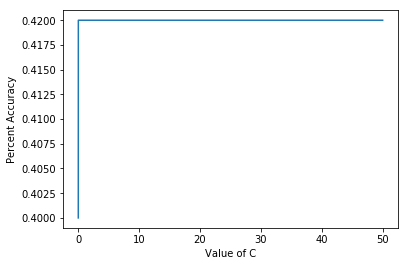

Test set Performance with C = 0.01:  0.32
Validation set Performance with C = 0.001:0.37
Validation set Performance with C = 0.01:0.37
Validation set Performance with C = 0.1:0.37
Validation set Performance with C = 1.0:0.37
Validation set Performance with C = 2.0:0.37
Validation set Performance with C = 5.0:0.37
Validation set Performance with C = 10.0:0.37
Validation set Performance with C = 20:0.37
Validation set Performance with C = 30:0.37
Validation set Performance with C = 40:0.37
Validation set Performance with C = 50:0.37


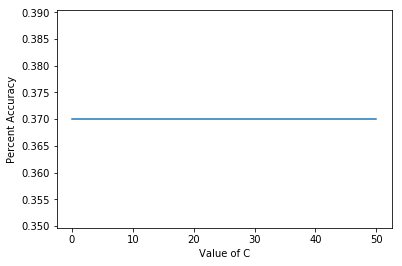

Test set Performance with C = 0.001:  0.338
Validation set Performance with C = 0.001:0.376
Validation set Performance with C = 0.01:0.376
Validation set Performance with C = 0.1:0.376
Validation set Performance with C = 1.0:0.376
Validation set Performance with C = 2.0:0.376
Validation set Performance with C = 5.0:0.376
Validation set Performance with C = 10.0:0.376
Validation set Performance with C = 20:0.376
Validation set Performance with C = 30:0.376
Validation set Performance with C = 40:0.376
Validation set Performance with C = 50:0.376


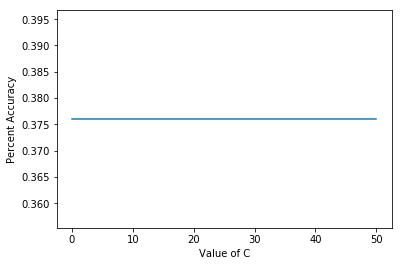

Test set Performance with C = 0.001:  0.3662
Validation set Performance with C = 0.001:0.36796
Validation set Performance with C = 0.01:0.36792
Validation set Performance with C = 0.1:0.36792
Validation set Performance with C = 1.0:0.36792
Validation set Performance with C = 2.0:0.36792
Validation set Performance with C = 5.0:0.36792
Validation set Performance with C = 10.0:0.36792
Validation set Performance with C = 20:0.36792
Validation set Performance with C = 30:0.36792
Validation set Performance with C = 40:0.36792
Validation set Performance with C = 50:0.36792


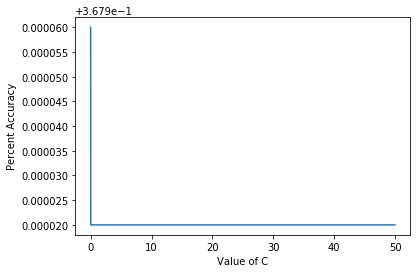

Test set Performance with C = 0.001:  0.374733380732
Validation set Performance with C = 0.001:0.3707
Validation set Performance with C = 0.01:0.370633333333
Validation set Performance with C = 0.1:0.370633333333
Validation set Performance with C = 1.0:0.370633333333
Validation set Performance with C = 2.0:0.370633333333
Validation set Performance with C = 5.0:0.370633333333
Validation set Performance with C = 10.0:0.370633333333
Validation set Performance with C = 20:0.370633333333
Validation set Performance with C = 30:0.370633333333
Validation set Performance with C = 40:0.370633333333
Validation set Performance with C = 50:0.370633333333


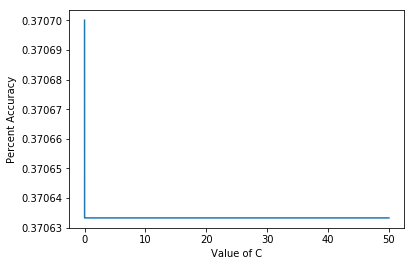

Test set Performance with C = 0.001:  0.371401918977


In [25]:
def evaluate_MaxEnt(X, Y):
    for i in [100, 1000, 10000, 50000, 60000]:
        # Loading data
        X_train = X[1:i]
        Y_train = Y[1:i]
        X_validate = X[i:i+int(i/2.0)]
        Y_validate = Y[i:i+int(i/2.0)]
        X_test = X[i+int(i/2.0):2*i]
        Y_test = Y[i+int(i/2.0):2*i]

        train_targets = np.zeros(Y_train.shape[0])
        for i in range(Y_train.shape[0]):
            train_targets[i] = np.argmax(Y_train[i])
        validation_targets = np.zeros(Y_validate.shape[0])
        for i in range(Y_validate.shape[0]):
            validation_targets[i] = np.argmax(Y_validate[i])
        test_targets = np.zeros(Y_test.shape[0])
        for i in range(Y_test.shape[0]):
            test_targets[i] = np.argmax(Y_test[i])



        #Tuning on the validation set for value of C
        C = [.001, .01, .1, 1.0, 2.0, 5.0, 10.0, 20, 30, 40, 50]
        best_C = 0
        max_score = 0.0
        x_values = []
        y_values = []
        for c in C:
            maxEnt = train_MaxEnt(X_train, train_targets, c)

            score = maxEnt.score(X_validate, validation_targets)
            x_values.append(c)
            y_values.append(score)
            if score > max_score:
                max_score = score
                best_C = c
            print("Validation set Performance with C = " + str(c) + ":" + str(score))
        plt.plot(x_values, y_values)
        plt.xlabel("Value of C")
        plt.ylabel("Percent Accuracy")
        plt.show()
        #Evaluating on Test set with best K value
        maxEnt = train_MaxEnt(X_train, train_targets, .001)
        test_score = maxEnt.score(X_test, test_targets)
        print("Test set Performance with C = " + str(best_C) + ":  " + str(test_score))

evaluate_MaxEnt(X, Y)       
    

## 4. Neural Network

In [26]:
import keras

ImportError: No module named keras

In [ ]:
# dividing training data with 60-20-20 train-val-test split

num_training = int(0.6 * X.shape[0])
num_val_or_test = int(0.2 * X.shape[0])

# shuffling with fixed seed

seed = 42

# create big matrix and shuffle to ensure that things get shuffled properly
# see https://stackoverflow.com/questions/35646908/numpy-shuffle-multidimensional-array-by-row-only-keep-column-order-unchanged

total = np.hstack((X,Y))

np.random.seed(42)

np.random.shuffle(total)

print(X.shape)
print(Y.shape)

# split back apart to partition into training, validation, and test sets

X_new = total[:,0:X.shape[1]]
Y_new = total[:,X.shape[1]:]

#X_new = X
#Y_new = Y # lol

print(X_new.shape)
print(Y_new.shape)

print(X[0])
print(Y[0])
print(X_new[0])
print(Y_new[0])

X_train = X_new[0:num_training,:]
Y_train = Y_new[0:num_training,:]

X_val = X_new[num_training:num_training+num_val_or_test,:]
Y_val = Y_new[num_training:num_training+num_val_or_test,:]

X_test = X_new[num_training+num_val_or_test:,:]
Y_test = Y_new[num_training+num_val_or_test:,:]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD, Adam
#u ready for some neural nets?

batch_size = 2048
epochs = 5
hidden_layers = 20
units_per_layer = 100
dropout_rate = 0.2

model = Sequential()
for i in range(hidden_layers):
    if i == 0:
        model.add(Dense(activation='relu', input_shape=(len(X[0]),), units=units_per_layer))
    else:
        model.add(Dense(activation='relu', units=units_per_layer))
    model.add(Dropout(dropout_rate))

model.add(Dense(activation='softmax',units=Y.shape[1]))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, Y_val))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#this is kinda like witchcraft, so I'm just wrapping it in a function so it looks like it makes more sense
def k_largest(k, arr):
    return arr.argsort()[-k:][::-1]
#array([4, 3, 1])

predictions = model.predict(X_test)
print predictions[0]
total = X_test.shape[0]
correct_with_top_2 = 0
correct_with_top_3 = 0
for i in range(X_test.shape[0]):
    pred = predictions[i,:]
    top2 = k_largest(2, pred)
    top3 = k_largest(3, pred)
    found = False
    for j in range(len(top2)):
        if Y_test[i,:][top2[j]] == 1.0:
            correct_with_top_2 += 1.0
            correct_with_top_3 += 1.0
            found = True
            break
    if found:
        continue
    if Y_test[i,:][top3[-1]] == 1.0:
        correct_with_top_3 += 1.0
            
#print(Y_train[0])
print('Test accuracy with top 2:', correct_with_top_2 / total)
print('Test accuracy with top 3:', correct_with_top_3 / total)

In [ ]:
#bucket_sizes = [3,4,5,2,7,2,5,2,3]
breakpoints = [3,7,12,14,21,23,28,30,33]
Xs = [[],[],[],[],[],[],[],[],[]]
Ys = [[],[],[],[],[],[],[],[],[]]

for i in range(X.shape[0]):
    index = np.argmax(Y[i,:])
    for j in range(len(breakpoints)):
        if index < breakpoints[j]:
            Xs[j].append(X[i,:].reshape((1,X.shape[1])))
            if j == 0:
                Ys[j].append(Y[i,0:breakpoints[j]].reshape((1,breakpoints[j])))
            else:
                Ys[j].append(Y[i,breakpoints[j-1]:breakpoints[j]].reshape((1,breakpoints[j]-breakpoints[j-1])))
            break
# was going to handle the NON-CRIMINAL vs NON -CRIMINAL case but got lazy...
#print(Xs[0][0])
#print(Ys[0][4])
X_arrs = []
Y_arrs = []

for i in range(len(Xs)):
    X_arrs.append(np.concatenate(Xs[i],axis=0))
    Y_arrs.append(np.concatenate(Ys[i],axis=0))
    print(X_arrs[i].shape)
    print(Y_arrs[i].shape)

## 5. Decision Tree

In [ ]:
from sklearn import tree
import graphviz
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train, Y_train)
print(clf.score(X_test,Y_test))
print(clf.score(X_train,Y_train))
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("crime") 
#graph

In [ ]:
best_layer_num = 0
best_accuracy = 0
best_class = None
layers = np.arange(3,50)
max_nodes = np.arange(Y_train.shape[1],5*Y_train.shape[1])
for layer in layers:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=layer)
    clf = clf.fit(X_train, Y_train)
    curr_acc = clf.score(X_val, Y_val)
    if curr_acc > best_accuracy:
        best_accuracy = curr_acc
        best_class = clf
        best_layer_num = layer

print(best_layer_num)
print(best_accuracy)
print(X_decoder(X_train[0]))
print(Y_decoder(Y_train[0]))
dot_data = tree.export_graphviz(best_class, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("crime") 
graph

## 6.1 GMM (clustering by space)

In [ ]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

num_clusters = 2

gmm = mixture.GaussianMixture(n_components=num_clusters)
X_new = np.concatenate([X[:,1].reshape(-1,1),X[:,0].reshape(-1,1)], axis=1)
gmm.fit(X_new)

latitude = 41.881832 
longitude = -87.623177

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt


print(X_new.shape)
print(Y.shape)

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

colors = ['red', 'green', 'blue', 'yellow']

crime_colors = ['black', 'white', 'lightblue', 'purple', 'orange', 'blue', 'pink', 'lightblue', 'brown']

crime_decoding = [
                "KIDNAPPING / CHILDREN",
                "ROBBERY/BURGLARY/THEFT",
                "ASSAULT/VIOLENCE",
                "NARCOTICS",
                "PUBLIC-RELATED CRIME",
                "DAMAGE/ARSON",
                "OTHER/NON-CRIMINAL",
                "WEAPON-RELATED",
                "PROHIBITIVE CRIME"
            ]

from matplotlib.patches import Polygon
from mpl_toolkits.basemap import pyproj
from mpl_toolkits.basemap import Basemap

class Basemap(Basemap):
    def ellipse(self, x0, y0, a, b, n, ax=None, **kwargs):
        """
        Draws a polygon centered at ``x0, y0``. The polygon approximates an
        ellipse on the surface of the Earth with semi-major-axis ``a`` and 
        semi-minor axis ``b`` degrees longitude and latitude, made up of 
        ``n`` vertices.

        For a description of the properties of ellipsis, please refer to [1].

        The polygon is based upon code written do plot Tissot's indicatrix
        found on the matplotlib mailing list at [2].

        Extra keyword ``ax`` can be used to override the default axis instance.

        Other \**kwargs passed on to matplotlib.patches.Polygon

        RETURNS
            poly : a maptplotlib.patches.Polygon object.

        REFERENCES
            [1] : http://en.wikipedia.org/wiki/Ellipse


        """
        ax = kwargs.pop('ax', None) or self._check_ax()
        g = pyproj.Geod(a=self.rmajor, b=self.rminor)
        # Gets forward and back azimuths, plus distances between initial
        # points (x0, y0)
        azf, azb, dist = g.inv([x0, x0], [y0, y0], [x0+a, x0], [y0, y0+b])
        tsid = dist[0] * dist[1] # a * b

        # Initializes list of segments, calculates \del azimuth, and goes on 
        # for every vertex
        seg = [self(x0+a, y0)]
        AZ = np.linspace(azf[0], 360. + azf[0], n)
        for i, az in enumerate(AZ):
            # Skips segments along equator (Geod can't handle equatorial arcs).
            if np.allclose(0., y0) and (np.allclose(90., az) or
                np.allclose(270., az)):
                continue

            # In polar coordinates, with the origin at the center of the 
            # ellipse and with the angular coordinate ``az`` measured from the
            # major axis, the ellipse's equation  is [1]:
            #
            #                           a * b
            # r(az) = ------------------------------------------
            #         ((b * cos(az))**2 + (a * sin(az))**2)**0.5
            #
            # Azymuth angle in radial coordinates and corrected for reference
            # angle.
            azr = 2. * np.pi / 360. * (az + 90.)
            A = dist[0] * np.sin(azr)
            B = dist[1] * np.cos(azr)
            r = tsid / (B**2. + A**2.)**0.5
            lon, lat, azb = g.fwd(x0, y0, az, r)
            x, y = self(lon, lat)

            # Add segment if it is in the map projection region.
            if x < 1e20 and y < 1e20:
                seg.append((x, y))

        poly = Polygon(seg, **kwargs)
        poly.set_alpha(0.5)
        ax.add_patch(poly)

        # Set axes limits to fit map region.
        self.set_axes_limits(ax=ax)

        return poly


plt.figure(figsize=(10,10))

m = Basemap(llcrnrlon=longitude-0.2,llcrnrlat=latitude-0.2,urcrnrlon=longitude+0.2,urcrnrlat=latitude+0.2,
                projection='merc',resolution='h')
m.drawcoastlines()
m.drawstates()
m.fillcontinents()
    

def plot_results(X, Y_, means, covariances, index, title):
    
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        #x1,y1=m(X[Y_ == i, 0],X[Y_ == i, 1])
        

        #.scatter(x1, y1, .8, color=color)
        #m.scatter(X[Y_ == i, 0], X[Y_ == i, 1], zorder=3, c=colors[i], latlon=True)
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        
        m.ellipse(mean[0],mean[1],v[0],v[1],100, color=colors[i])
        
    plt.xticks(())
    plt.yticks(())
    

plot_results(X_new, gmm.predict(X_new), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

for i in range(Y.shape[1]):
    Xs = []
    for j in range(Y.shape[0]):
        if Y[j,i] == 1:
            Xs.append(X_new[j,:])
    Xs = np.array(Xs)
    #print(Xs)
    #m.scatter(Xs[:, 0], Xs[:, 1], c=crime_colors[i], latlon=True, label=crime_decoding[i])
    m.scatter(Xs[:, 0], Xs[:, 1], zorder=3, c=crime_colors[i], latlon=True, label=crime_decoding[i])

#ax.show()
#fig
#ax.figure.canvas.draw()
plt.gca().legend()
plt.show()

#plt.show() 
#print(preds)
#print(Y)


## 6.2 GMM (clustering by time)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn import mixture
from matplotlib.colors import to_rgba_array

colors = ['red', 'green', 'blue', 'yellow']

crime_colors = ['black', 'white', 'lightblue', 'purple', 'orange', 'blue', 'pink', 'lightblue', 'brown']
#{'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
crime_decoding = [
                "KIDNAPPING / CHILDREN",
                "ROBBERY/BURGLARY/THEFT",
                "ASSAULT/VIOLENCE",
                "NARCOTICS",
                "PUBLIC-RELATED CRIME",
                "DAMAGE/ARSON",
                "OTHER/NON-CRIMINAL",
                "WEAPON-RELATED",
                "PROHIBITIVE CRIME"
            ]

num_clusters = 2

gmm = mixture.GaussianMixture(n_components=num_clusters)
#X_new = np.concatenate([X[:,1].reshape(-1,1),X[:,0].reshape(-1,1)], axis=1)
#print(X.shape)
mins_to_hours = lambda x: (x/60.0)
X_new = np.apply_along_axis(mins_to_hours, 1, X)
print(X[0])
print(X_new[0])
print(X_new.shape)
gmm.fit(X_new)

def plot_curves(gmm):
    mu = gmm.means_
    var = gmm.covariances_
    #sigma = [np.sqrt(var[0]), np.sqrt(var[1])]
    sigma = [np.sqrt(var[i]) for i in range(len(var))]
    x = np.linspace(0, 24, 100)
    
    for i in range(len(mu)):
        curve = plt.mlab.normpdf(x, mu[i], sigma[i])
        plt.plot(x, curve.reshape((100,)), color=colors[i])
        plt.fill_between(x,curve.reshape((100,)) , color='grey', alpha=0.5)
    
    
    #plt.savefig('data_t0.jpg')

plot_curves(gmm)

for i in range(Y.shape[1]):
    Xs = []
    for j in range(Y.shape[0]):
        if Y[j,i] == 1:
            Xs.append(X_new[j,:])
    Xs = np.array(Xs)
    print(Xs.shape)
    #m.scatter(Xs[:, 0], Xs[:, 1], c=crime_colors[i], latlon=True, label=crime_decoding[i])
    #m.scatter(Xs[:, 0], Xs[:, 1], zorder=3, c=crime_colors[i], latlon=True, label=crime_decoding[i])
    #plt.eventplot(Xs.reshape((Xs.size,)), orientation='horizontal', colors=to_rgba_array(crime_colors[i]),lineoffsets=0,linelengths=0.05)
    Xs = Xs.reshape((Xs.size,))
    #print(np.zeros(len(Xs)))
    plt.scatter(Xs.reshape((Xs.size,)), np.zeros(len(Xs)) + 0.005, color=crime_colors[i], label=crime_decoding[i])
    #plt.axis('off')
plt.legend()
plt.show()
#plt.figure()
#a = [1,2,5,6,9,11,15,17,18]
#plt.hlines(1,1,20)  # Draw a horizontal line
#plt.eventplot(a, orientation='horizontal', colors='b')
#plt.axis('off')
#plt.show()

In [29]:
from sklearn.dummy import DummyClassifier
def baselines(X, Y):
    # Loading data
    X_train = X[1:10000]
    Y_train = Y[1:10000]
    X_validate = X[10000:15000]
    Y_validate = Y[10000:15000]
    X_test = X[15000:20000]
    Y_test = Y[15000:20000]
    train_targets = np.zeros(Y_train.shape[0])
    for i in range(Y_train.shape[0]):
        train_targets[i] = np.argmax(Y_train[i])
    validation_targets = np.zeros(Y_validate.shape[0])
    for i in range(Y_validate.shape[0]):
        validation_targets[i] = np.argmax(Y_validate[i])
    test_targets = np.zeros(Y_test.shape[0])
    for i in range(Y_test.shape[0]):
        test_targets[i] = np.argmax(Y_test[i])
    #majority vote
    clf = DummyClassifier(strategy='most_frequent')
    clf.fit(X_train, train_targets)
    indices =  np.sum(Y_train, axis=0).argsort()[-3:][::-1]
    mask = np.zeros(Y_train.shape[1])
    for index in indices:
        mask[index] = 1
    
    extended_mask = np.tile(mask, (Y_validate.shape[0],1))
    result = np.multiply(extended_mask, Y_validate)
    print "Majority Vote Top 3 Validation Score:", np.sum(np.amax(result, axis = 1))/(Y_validate.shape[0])
    extended_mask = np.tile(mask, (Y_test.shape[0],1))
    result = np.multiply(extended_mask, Y_test)
    print "Majority Vote Top 3 Test Score:", np.sum(np.amax(result, axis = 1))/(Y_test.shape[0])
    
    print("Majority Vote Top 1 Validation score:", clf.score(X_validate, validation_targets) )
    print("Majority Vote Top 1 Test score:", clf.score(X_test, test_targets))
    
    
    clf2 = DummyClassifier(strategy='uniform')
    clf2.fit(X_train, train_targets)
    print("Random uniform sampling validation score", clf2.score(X_validate, validation_targets))
    print("Random uniform sampling test score", clf2.score(X_test,test_targets))

baselines(X, Y)

Majority Vote Top 3 Validation Score: 0.731
Majority Vote Top 3 Test Score: 0.7204
('Majority Vote Top 1 Validation score:', 0.379)
('Majority Vote Top 1 Test score:', 0.3624)
('Random uniform sampling validation score', 0.1062)
('Random uniform sampling test score', 0.1116)
